In [1]:
import pandas as pd
import json

In [35]:
with open('bbc_articles.json', encoding="utf8") as f:
    data = json.load(f)

df = pd.DataFrame(data)


In [36]:
df.head(2)

,menu,submenu,topic,text,title,subtitle,date,images,author,videos,url,authors,video
0,/news,/news/topics/c2vdnvdg6xxt,/news/world-middle-east-69059863,Given the intensity of the conflict and the ab...,Israel-Gaza briefings: How plans for ‘the day ...,The Day After might sound like the title of a ...,2024-05-26 03:12:04,"[/bbcx/grey-placeholder.png, https://ichef.bbc...",No Author,[],https://www.bbc.com/news/world-middle-east-690...,NaN,NaN
1,/news,/news/topics/c2vdnvdg6xxt,/news/articles/cz9950n003yo,One of them is aid. Months after some Israelis...,Israeli activists battle over Gaza-bound aid c...,Read about our approach to external linking.,2024-05-25 10:12:05,"[/bbcx/grey-placeholder.png, https://ichef.bbc...",No Author,[],https://www.bbc.com/news/articles/cz9950n003yo,NaN,NaN


# Data Cleaning


In [37]:
df.isnull().sum()

menu           0
submenu        3
topic         23
text           0
title          0
subtitle       6
date          16
images         0
author       270
videos       270
url          270
authors     4006
video       4044
dtype: int64

In [38]:
df.topic.sample(10)

3770                            /news/videos/cq5nx3y3gwro
1178                     /news/world-middle-east-69006734
405                        /news/world-us-canada-69023845
391                        /news/world-us-canada-69024952
2965    /travel/article/20240506-the-amache-national-h...
2994    /travel/article/20240227-pura-vida-costa-ricas...
778                             /news/world-asia-68911309
3021    /travel/article/20231219-greccio-the-italian-v...
3871                                             Football
2906    /travel/article/20240112-yennayer-north-africa...
Name: topic, dtype: object

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df.sample(10).to_csv('sample.csv', index=False)

In [41]:
df['text'] = df['text'].fillna('')
df['title'] = df['title'].fillna('')
df['subtitle'] = df['subtitle'].fillna('')

In [42]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [43]:
df.isnull().sum()

menu           0
submenu        3
topic         23
text           0
title          0
subtitle       0
date         913
images         0
author       270
videos       270
url          270
authors     4006
video       4044
dtype: int64

In [44]:
df['submenu'] = df['submenu'].fillna('')
df['topic'] = df['topic'].fillna('')

In [45]:
def clean_sub(line):
    l = line.split('/')
    if len(l)>2:
        return l[-2]
    return l[0]

df.submenu = df.submenu.apply(clean_sub)



In [46]:
def clean_top(line):
    l = line.split('/')
    return l[-1]
df.topic = df.topic.apply(clean_top)

In [48]:
df.topic.sample(10)

212                                          cx88nqjzdwwo
2095                                  technology-68445981
2940            the-last-remaining-lamplighters-of-london
2938    shukubo-japan-s-temples-offering-a-taste-of-mo...
3478            20240423-how-to-make-a-mini-wildlife-pond
276                                          cv22l8458v2o
3182    20240224-six-of-the-best-hikes-in-and-around-s...
3681    20240304-adalar-explore-the-ottoman-past-on-is...
1596    20240215-why-insects-are-drawn-to-artificial-l...
2528                             world-us-canada-68420543
Name: topic, dtype: object

In [51]:
df.menu = df.menu.str.replace('/', '')

In [53]:
df['combined_text'] = df['text'] + ' ' + df['title'] + ' ' + df['subtitle']

In [54]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['combined_text'])

In [55]:
num_clusters = 5  # Define the number of clusters
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(tfidf_matrix)
df['cluster'] = km.labels_

In [56]:
# Categorize articles based on submenu
submenu_le = LabelEncoder()
df['submenu_category'] = submenu_le.fit_transform(df['submenu'].fillna('Unknown'))


In [57]:
# Display results
categorized_df = df[['title', 'submenu', 'submenu_category', 'cluster']]

In [58]:
categorized_df.head()

,title,submenu,submenu_category,cluster
0,Israel-Gaza briefings: How plans for ‘the day ...,topics,8,4
1,Israeli activists battle over Gaza-bound aid c...,topics,8,4
2,Three more Israeli hostages' bodies found in Gaza,topics,8,4
3,Israeli activists battle over Gaza-bound aid c...,topics,8,4
4,Top UN court orders Israel to stop Rafah offen...,topics,8,4


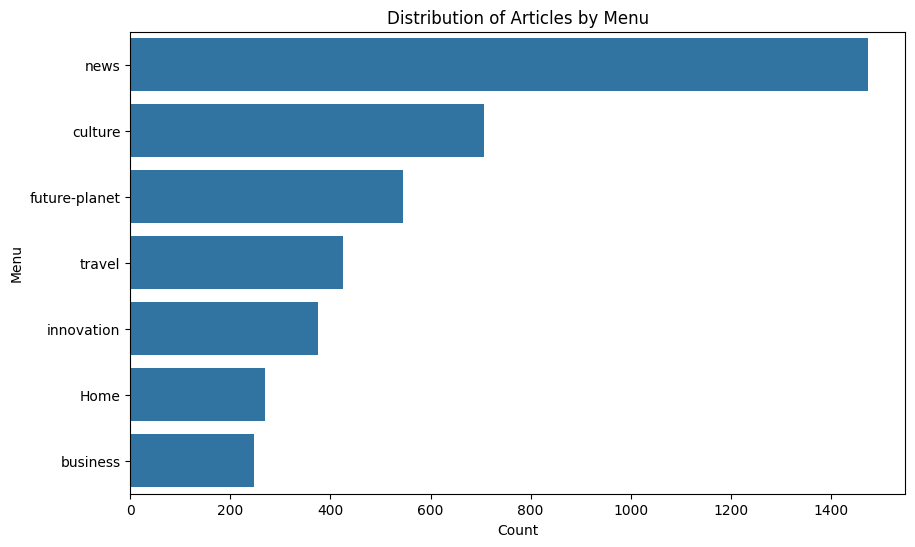

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='menu', order=df['menu'].value_counts().index)
plt.title('Distribution of Articles by Menu')
plt.xlabel('Count')
plt.ylabel('Menu')
plt.show()

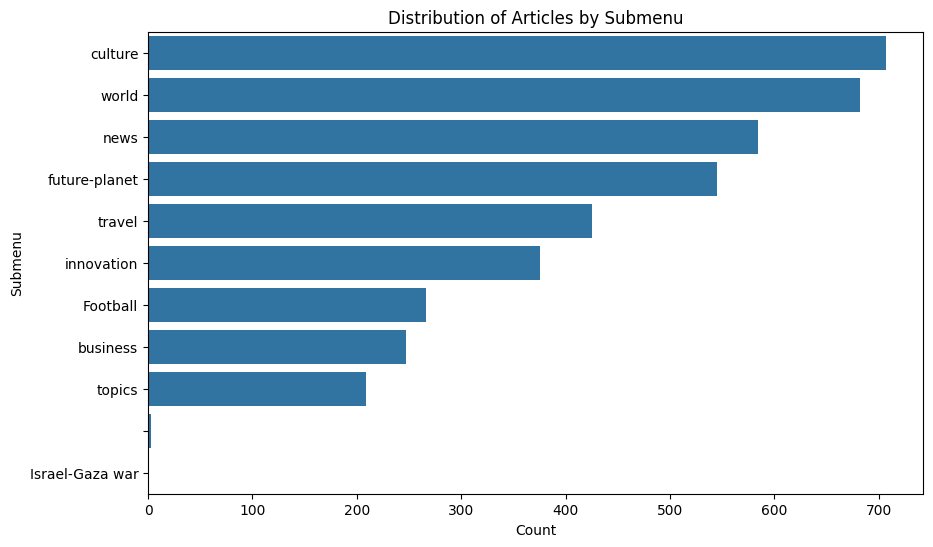

In [60]:
# Distribution of articles by submenu
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='submenu', order=df['submenu'].value_counts().index)
plt.title('Distribution of Articles by Submenu')
plt.xlabel('Count')
plt.ylabel('Submenu')
plt.show()

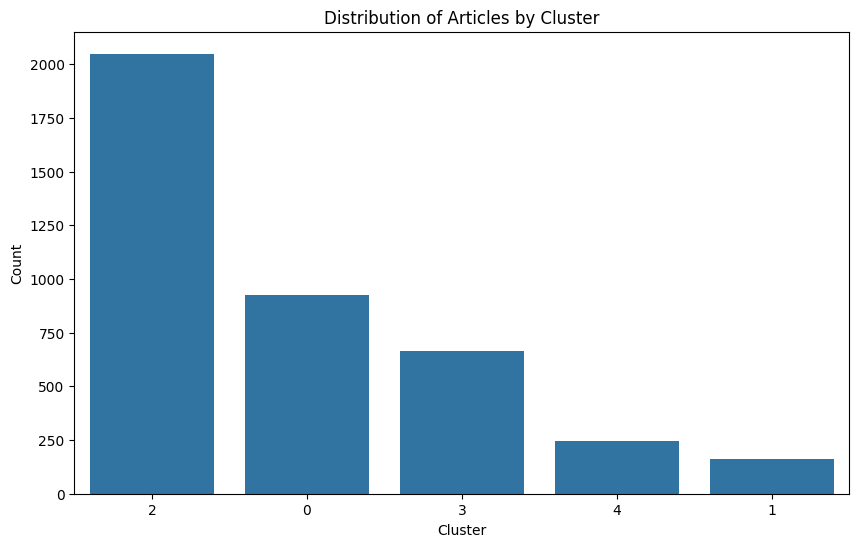

In [61]:
# Cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cluster', order=df['cluster'].value_counts().index)
plt.title('Distribution of Articles by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()